Important:
https://quantpie.co.uk/bsm_bin_c_formula/bs_bin_c_summary.php

https://bsic.it/greexotics-a-first-step-in-the-land-of-exotic-derivatives-greeks-part-1/

https://quant.stackexchange.com/questions/53664/vega-of-binary-option

https://www.binarytrading.com/binary-options-greeks/

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Functions for Digital Call Options](#p1)

# [2. Functions for Digital Put Options](#p2)

# [3. Functions for Dual-Binary Options](#p3)

# [4. Functions for charts](#p4)

# [5. Greeks for Digital Calls](#p5)

# [6. Greeks for Digital Puts](#p6)

# [7. Greeks for Dual Digital Options](#p7)

In [1]:
import math
import numpy as np
import scipy.stats as si
from scipy.stats import norm
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import pandas as pd
import datetime as dt
import warnings

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# <a id = "p1">1.</a>  <font color = "green"> Functions for Digital Call Options </font>  [back to table of contents](#top)

In [2]:
def Digital_Call_Delta(r, q, vol, strike, T, S0):
    '''
    Computes Delta for a Digital Call.

    r: Interest rate
    q: Dividend yield
    vol: Implied volatility
    strike: Strike Price (K)
    T: Time to Maturity
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d2 = (math.log(S0/strike) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    
    delta = math.exp(-r * T) * norm.pdf(d2) / (S0 * vol * math.sqrt(T))
    
    return delta

In [3]:
def Digital_Call_Gamma(r, q, vol, strike, T, S0):
    '''
    Computes Gamma for a Digital Call.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1 = (math.log(S0 / strike) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T)

    gamma = -(math.exp(-r * T) * d1 * norm.pdf(d2))/ (S0**2 * vol**2 * T)
    
    return gamma

In [4]:
def Digital_Call_Vega(r, q, vol, strike, T, S0):
    '''
    Computes Vega for a Digital Call.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1 = (math.log(S0 / strike) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T)

    vega = -(math.exp(-r * T) * d1 * norm.pdf(d2)) / vol
    
    return vega

In [5]:
def Digital_Call_Theta(r, q, vol, strike, T, S0):
    '''
    Computes Theta for a Digital Call.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1 = (math.log(S0 / strike) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T)

    theta = \
        (
            math.exp(-r * T) 
            * 
            (
                norm.pdf(d2) 
                * 
                (1/(2*T)) 
                * 
                (1/(vol * math.sqrt(T))) 
                * 
                (math.log(S0 / strike) - (r - q - 0.5 * vol**2) * T) 
                + 
                r * norm.cdf(d2)
            )
        )

    return theta

# <a id = "p2">2.</a>  <font color = "green"> Functions for Digital Put Options </font>  [back to table of contents](#top)

In [6]:
def Digital_Put_Delta(r, q, vol, strike, T, S0):
    '''
    Computes Delta for a Digital Put.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d2 = (math.log(S0 / strike) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))

    delta = -math.exp(-r * T) * norm.pdf(d2) / (S0 * vol * math.sqrt(T))

    return delta

In [7]:
def Digital_Put_Gamma(r, q, vol, strike, T, S0):
    '''
    Computes Gamma for a Digital Put.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1 = (math.log(S0 / strike) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2 = d1 - vol * math.sqrt(T)

    gamma = (math.exp(-r * T) * d1 * norm.pdf(d2))/ (S0**2 * vol**2 * T)
    
    return gamma

In [8]:
def Digital_Put_Vega(r, q, vol, strike, T, S0):
    '''
    Computes Vega for a Digital Put.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1 = (math.log(S0 / strike) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2 = (math.log(S0 / strike) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))

    vega = (math.exp(-r * T) * d1 * norm.pdf(d2)) / vol

    return vega

In [9]:
def Digital_Put_Theta(r, q, vol, strike, T, S0):
    '''
    Computes Theta for a Digital Put.

    r: Interest rate (continuously compounded)
    q: Dividend yield (continuously compounded)
    vol: Implied volatility (annualized)
    strike: Strike Price (K)
    T: Time to Maturity (in years)
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d2 = (math.log(S0 / strike) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))

    theta = \
        (
            math.exp(-r * T) 
            * 
            (
                -norm.pdf(d2) 
                * 
                (1/(2*T)) 
                * 
                (1/(vol * math.sqrt(T))) 
                * 
                (math.log(S0 / strike) - (r - q - 0.5 * vol**2) * T) 
                + 
                r * norm.cdf(-d2)
            )
        )

    return theta

# <a id = "p3">3.</a>  <font color = "green"> Functions for Dual-Binary Options </font>  [back to table of contents](#top)

In [10]:
def Dual_Binary_Digital_Delta(r, q, vol, d, u, T, S0):
    '''
    r: Interest rate
    q: Dividend yield
    vol: Implied volatility
    d: Lower Strike
    u: Upper Strike
    T: Time to Maturity
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1_lower = (math.log(S0/d) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_lower = (math.log(S0/d) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    
    d1_upper = (math.log(S0/u) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_upper = (math.log(S0/u) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    
    delta = math.exp(-r * T) * (1 / (S0 * vol * math.sqrt(T))) * (norm.pdf(d2_lower) - norm.pdf(d2_upper))
    
    return delta

In [11]:
def Dual_Binary_Digital_Gamma(r, q, vol, d, u, T, S0):
    '''
    r: Interest rate
    q: Dividend yield
    vol: Implied volatility
    d: Lower Strike
    u: Upper Strike
    T: Time to Maturity
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1_lower = (math.log(S0/d) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_lower = (math.log(S0/d) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    
    d1_upper = (math.log(S0/u) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_upper = (math.log(S0/u) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    

    gamma = -math.exp(-r * T) * (1 / (S0**2 * vol**2 * T)) * (d1_lower * norm.pdf(d2_lower) - d1_upper * norm.pdf(d2_upper))
    
    return gamma

In [12]:
def Dual_Binary_Digital_Vega(r, q, vol, d, u, T, S0):
    '''
    r: Interest rate
    q: Dividend yield
    vol: Implied volatility
    d: Lower Strike
    u: Upper Strike
    T: Time to Maturity
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1_lower = (math.log(S0/d) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_lower = (math.log(S0/d) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    
    d1_upper = (math.log(S0/u) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_upper = (math.log(S0/u) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))

    vega = -(math.exp(-r * T) * (d1_lower * norm.pdf(d2_lower)-d1_upper * norm.pdf(d2_upper))) / vol

    return vega

In [13]:
def Dual_Binary_Digital_Theta(r, q, vol, d, u, T, S0):
    '''
    r: Interest rate
    q: Dividend yield
    vol: Implied volatility
    d: Lower Strike
    u: Upper Strike
    T: Time to Maturity
    S0: Spot price
    '''
    if S0 <= 0 or vol <= 0 or T <= 0:
        raise ValueError("S0, vol, and T must be greater than zero.")

    d1_lower = (math.log(S0/d) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_lower = (math.log(S0/d) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    
    d1_upper = (math.log(S0/u) + (r - q + 0.5 * vol**2) * T) / (vol * math.sqrt(T))
    d2_upper = (math.log(S0/u) + (r - q - 0.5 * vol**2) * T) / (vol * math.sqrt(T))

    pdf_d2_lower = norm.pdf(d2_lower)
    pdf_d2_upper = norm.pdf(d2_upper)
    cdf_d2_lower = norm.cdf(d2_lower)
    cdf_d2_upper = norm.cdf(d2_upper)


    theta_lower = \
        (
            math.exp(-r * T) 
            * 
            (
                (pdf_d2_lower)
                * 
                (1/(2*T)) 
                * 
                (1/(vol * math.sqrt(T))) 
                * 
                (math.log(S0 / d) - (r - q - 0.5 * vol**2) * T) 
                + 
                r * (cdf_d2_lower)
            )
        )
        
    theta_upper = \
    (
        math.exp(-r * T) 
        * 
        (
            (pdf_d2_upper)
            * 
            (1/(2*T)) 
            * 
            (1/(vol * math.sqrt(T))) 
            * 
            (math.log(S0 / u) - (r - q - 0.5 * vol**2) * T) 
            + 
            r * (cdf_d2_upper)
        )
    )
    
    theta = theta_lower-theta_upper
    
    return theta

# <a id = "p4">4.</a>  <font color = "green"> Functions for charts </font>  [back to table of contents](#top)

In [14]:
# Use this ONLY if the options model parameters are r,q,vol,strike,T,S0

def DigitalOptionGreeks(model):
    # Initial parameters
    r = 0
    q = 0
    vol = 0.20
    strike = 100
    T = 1
    S0 = 100    
    
    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    prices = [model(r, q, vol, strike, T, S) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Greek Value')
    ax.set_title(f"{model.__name__} Value")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S0)

    rf_slider_ax = fig.add_axes([0.25, 0.28, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    dividend_yield_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    dividend_yield_slider = Slider(dividend_yield_slider_ax, 'Dividend Yield', 0.00, 0.20, valinit=q)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=vol)
    
    strike_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=strike)
    
    time_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        dividend_yield_current = dividend_yield_slider.val
        sigma_current = sigma_slider.val
        strike_current = strike_slider.val
        T_current = time_slider.val

        prices = [model(rf_current, dividend_yield_current, sigma_current, strike_current, T_current, S) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    dividend_yield_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        dividend_yield_slider.reset()
        sigma_slider.reset()
        strike_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

In [15]:
# Use this ONLY if the options model parameters are r,q,vol,d,u,T,S0

def DoubleBinaryOptionGreeks(model):
    # Initial parameters
    r = 0
    q = 0
    vol = 0.20
    d = 80
    u = 120
    T = 1
    S0 = 100    
    
    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    prices = [model(r, q, vol, d, u, T, S) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Greek Value')
    ax.set_title(f"{model.__name__} Value")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S0)

    rf_slider_ax = fig.add_axes([0.25, 0.28, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    dividend_yield_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    dividend_yield_slider = Slider(dividend_yield_slider_ax, 'Dividend Yield', 0.00, 0.20, valinit=q)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=vol)
    
    lower_barrier_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    lower_barrier_slider = Slider(lower_barrier_slider_ax, 'Lower Barrier', 50, 100, valinit=d)

    upper_barrier_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    upper_barrier_slider = Slider(upper_barrier_slider_ax, 'Upper Barrier', 100, 150, valinit=u)
    
    time_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        dividend_yield_current = dividend_yield_slider.val
        sigma_current = sigma_slider.val
        lower_barrier_current = lower_barrier_slider.val
        upper_barrier_current = upper_barrier_slider.val
        T_current = time_slider.val

        prices = [model(rf_current, dividend_yield_current, sigma_current, lower_barrier_current, upper_barrier_current, T_current, S) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    dividend_yield_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    lower_barrier_slider.on_changed(sliders_on_changed)
    upper_barrier_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        dividend_yield_slider.reset()
        sigma_slider.reset()
        lower_barrier_slider.reset()
        upper_barrier_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

# <a id = "p5">5.</a>  <font color = "green"> Greeks for Digital Calls </font>  [back to table of contents](#top)

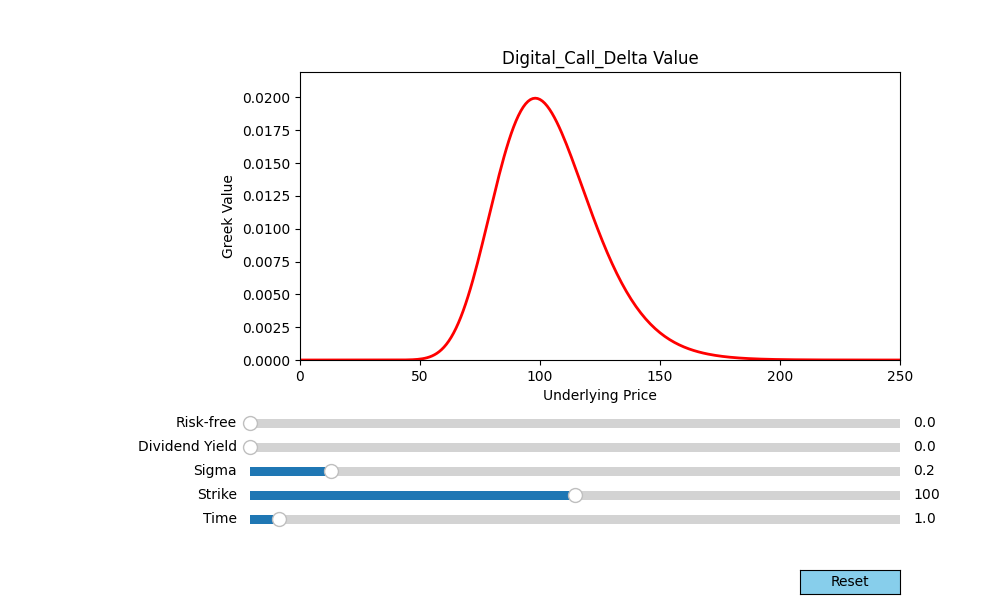

In [16]:
DigitalOptionGreeks(Digital_Call_Delta)

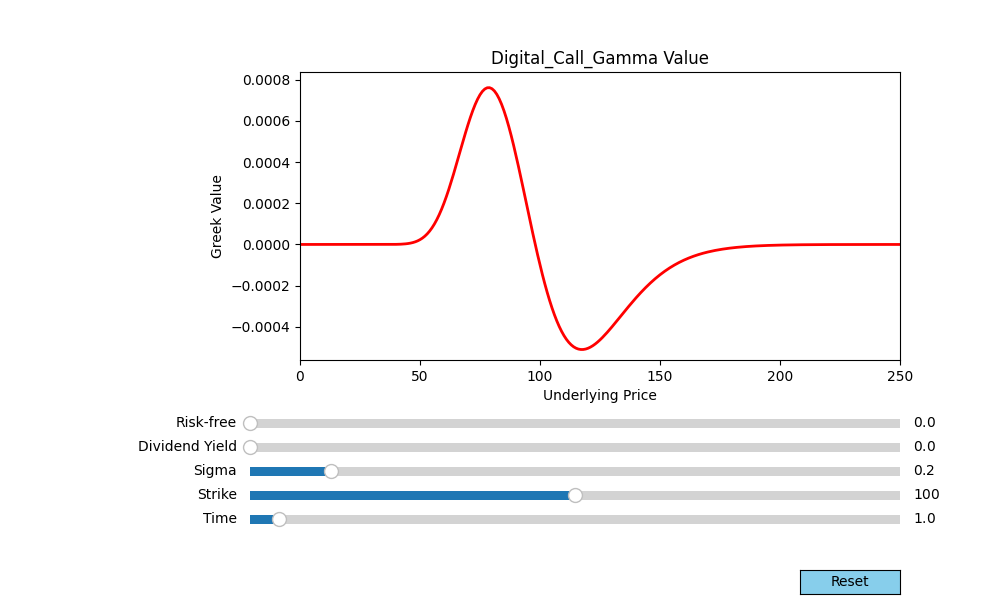

In [17]:
DigitalOptionGreeks(Digital_Call_Gamma)

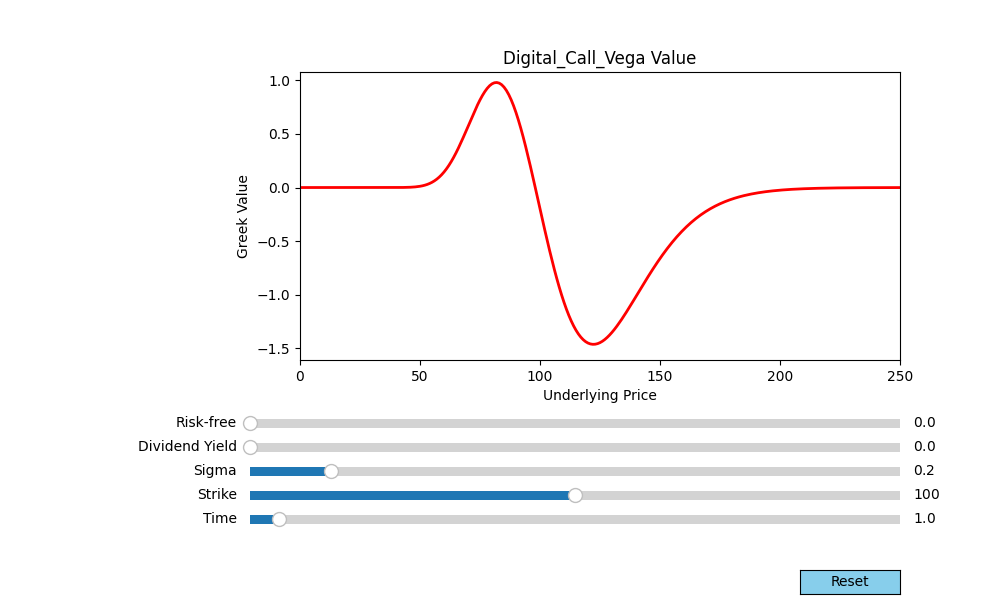

In [18]:
DigitalOptionGreeks(Digital_Call_Vega)

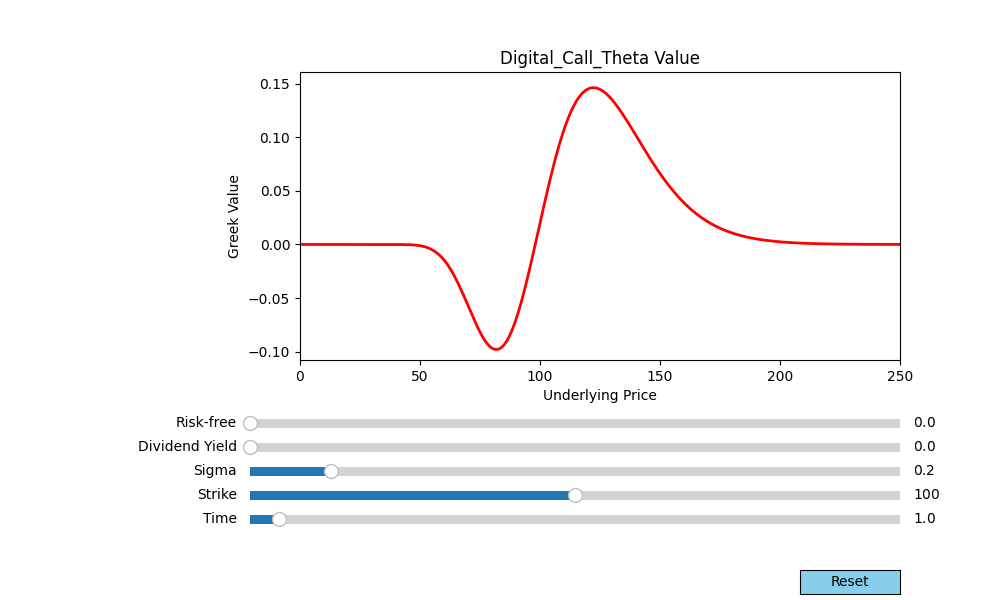

In [19]:
DigitalOptionGreeks(Digital_Call_Theta)

# <a id = "p6">6.</a>  <font color = "green"> Greeks for Digital Puts </font>  [back to table of contents](#top)

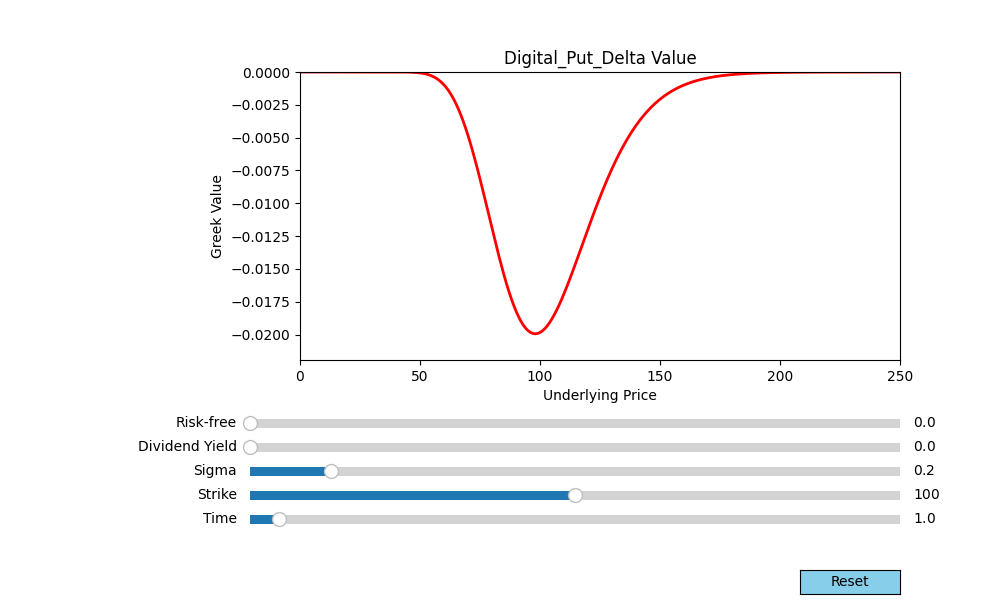

In [20]:
DigitalOptionGreeks(Digital_Put_Delta)

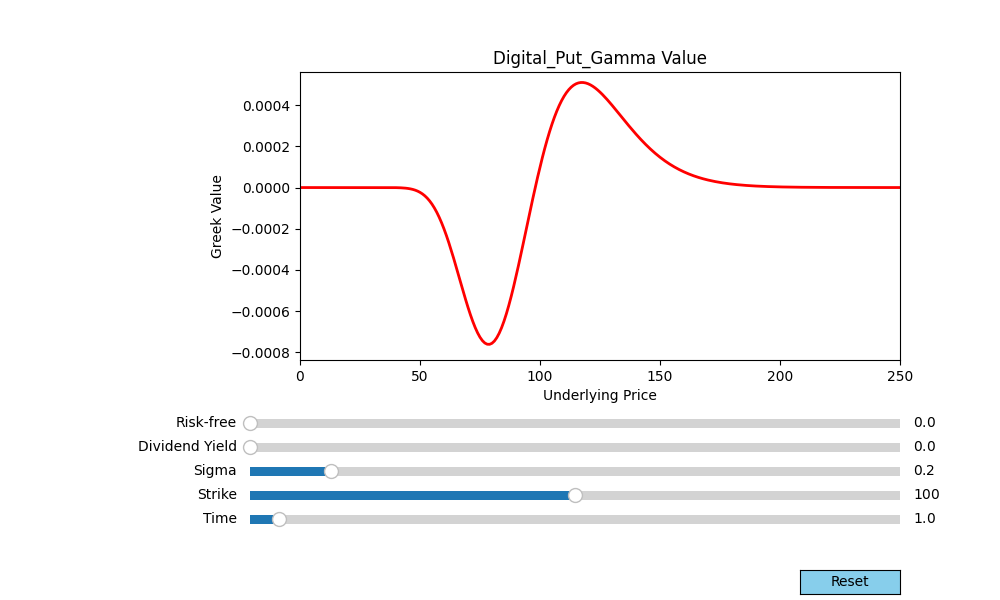

In [21]:
DigitalOptionGreeks(Digital_Put_Gamma)

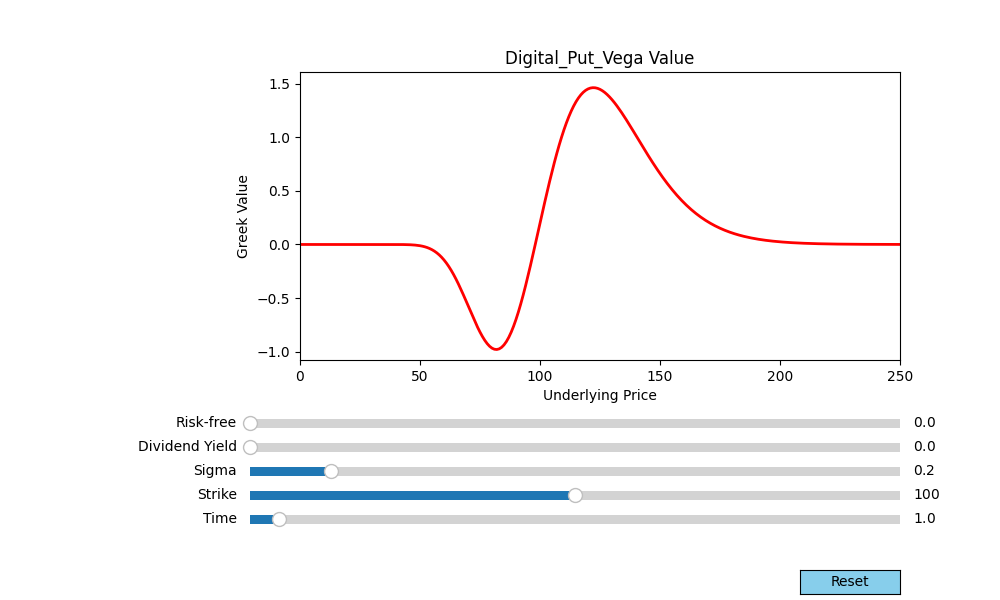

In [22]:
DigitalOptionGreeks(Digital_Put_Vega)

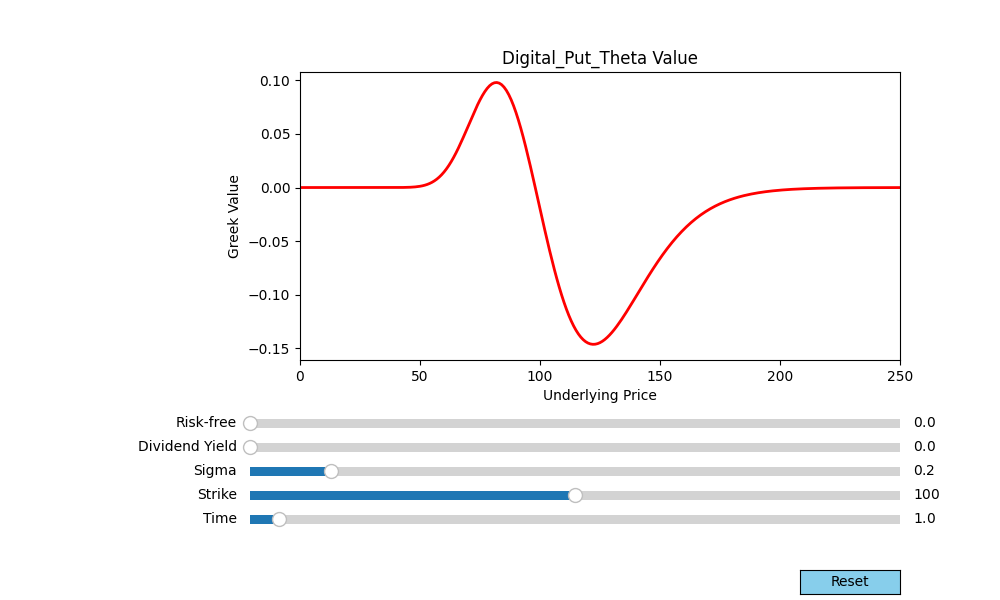

In [23]:
DigitalOptionGreeks(Digital_Put_Theta)

# <a id = "p7">7.</a>  <font color = "green"> Greeks for Dual Digital Options </font>  [back to table of contents](#top)

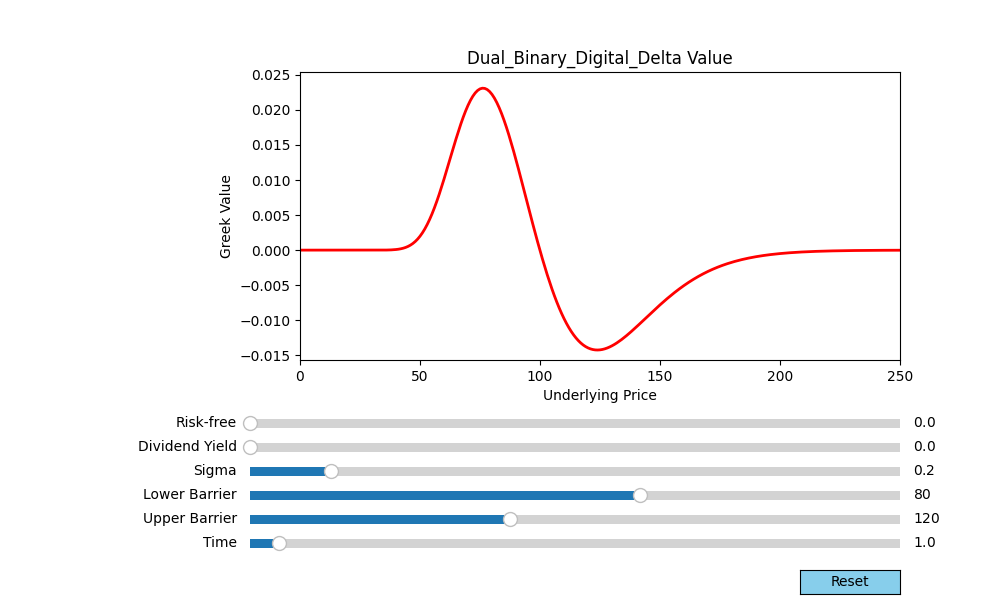

In [24]:
DoubleBinaryOptionGreeks(Dual_Binary_Digital_Delta)

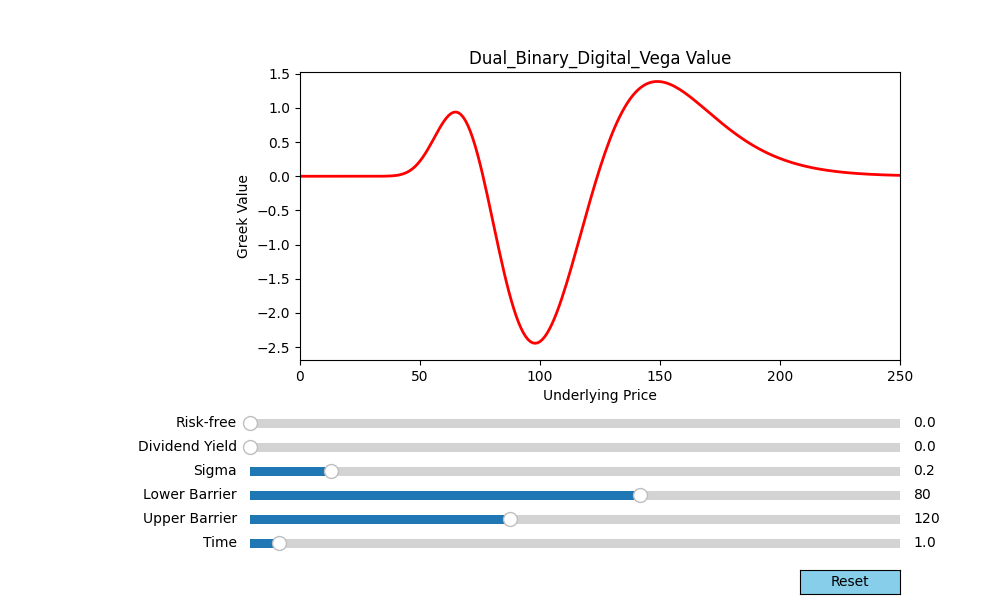

In [25]:
DoubleBinaryOptionGreeks(Dual_Binary_Digital_Vega)

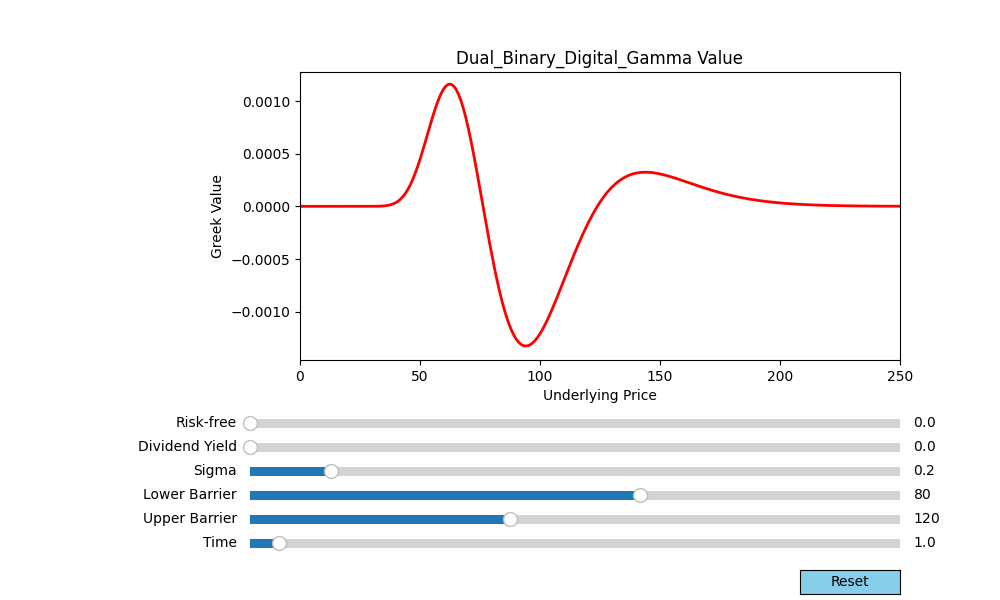

In [26]:
DoubleBinaryOptionGreeks(Dual_Binary_Digital_Gamma)

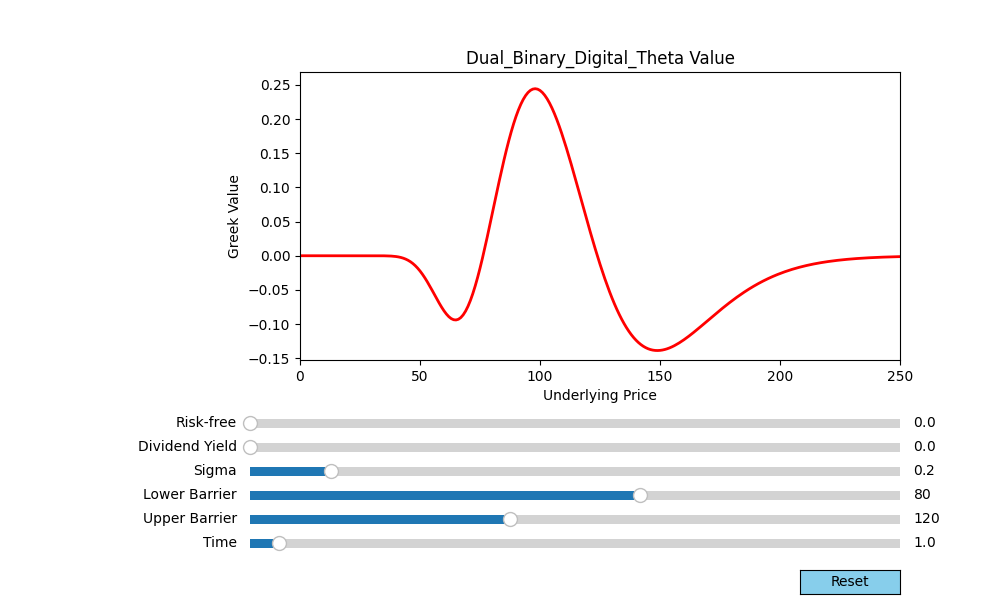

In [27]:
DoubleBinaryOptionGreeks(Dual_Binary_Digital_Theta)